In [1]:
%%time

import pandas as pd
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
import plotly.io as pio

CPU times: user 9.37 s, sys: 1.57 s, total: 10.9 s
Wall time: 19.9 s


In [2]:
%%time


# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Load dataset
news_df = pd.read_parquet('./data/news_final_project_clean.parquet')

# Sample 10% of the data for testing
# news_df_sampled = news_df.sample(frac=0.1)

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Preprocess text by converting to lowercase and removing stopwords."""
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to sampled data
news_texts_preprocessed = [preprocess_text(text) for text in news_df['cleaned_text'].tolist()]



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 23.6 s, sys: 5.75 s, total: 29.3 s
Wall time: 38.3 s


In [3]:
%%time

# Initialize BERTopic
topic_model = BERTopic(language="english", min_topic_size=500, n_gram_range=(1, 2),
                       calculate_probabilities=True, verbose=True)

# Fit the model on preprocessed sampled data
topics, probabilities = topic_model.fit_transform(news_texts_preprocessed)

# Save the model
topic_model.save("./models/topic_model_500.model")



2024-02-29 00:20:50,792 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/6012 [00:00<?, ?it/s]

2024-02-29 02:11:46,164 - BERTopic - Embedding - Completed ✓
2024-02-29 02:11:46,166 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-29 02:22:56,618 - BERTopic - Dimensionality - Completed ✓
2024-02-29 02:22:56,623 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current p

CPU times: user 7h 24min 16s, sys: 1h 28min 59s, total: 8h 53min 15s
Wall time: 2h 11min 28s


In [2]:
%%time

topic_model = BERTopic.load("./models/topic_model_500.model")

# Get topic information
freq = topic_model.get_topic_info()
print(f"Topics found: {freq.shape[0]}")
display(freq)

Topics found: 38


,Topic,Count,Name,Representation,Representative_Docs
0,-1,121598,-1_ai_data_said_new,"[ai, data, said, new, technology, also, compan...",[new study strategyr highlights $3.5 billion g...
1,0,11673,0_market_healthcare_ai_medical,"[market, healthcare, ai, medical, health, pati...",[ai healthcare market – global industry analys...
2,1,5915,1_market_report_growth_global,"[market, report, growth, global, analysis, res...",[global ai market top manufacturers analysis 2...
3,2,5796,2_ai_nvidia_stock_stocks,"[ai, nvidia, stock, stocks, company, investors...",[better ai stock: nvidia vs. intel | nasdaq pl...
4,3,5428,3_ai_market_energy_data,"[ai, market, energy, data, automotive, traffic...",[automotive ai market size 2020 analysis busin...
5,4,4904,4_chatgpt_openai_ai_users,"[chatgpt, openai, ai, users, chatbot, new, use...",[chatgpt: end data analytics know it? | silico...
6,5,2383,5_students_chatgpt_education_ai,"[students, chatgpt, education, ai, teachers, s...","[paper exams, chatbot bans: colleges seek 'cha..."
7,6,2180,6_art_images_image_ai,"[art, images, image, ai, artists, adobe, like,...",[surreal real? breathtaking ai tool dall-e tak...
8,7,2124,7_china_chinese_ai_chinas,"[china, chinese, ai, chinas, baidu, ernie, us,...",[chinese search engine company baidu unveils e...
9,8,2025,8_altman_openai_board_sam,"[altman, openai, board, sam, ceo, altmans, mic...",[openai reinstates sam altman chief executive ...


CPU times: user 32.3 s, sys: 3.79 s, total: 36.1 s
Wall time: 45.4 s


In [3]:
%%time

# Set default renderer for Plotly in Jupyter
pio.renderers.default = 'iframe'

# Visualize topics
topic_model.visualize_topics().show()

CPU times: user 8.77 s, sys: 137 ms, total: 8.91 s
Wall time: 10.8 s


In [3]:
%%time

import pandas as pd
from bertopic import BERTopic

# Load the dataset
news_df = pd.read_parquet('./data/news_final_project_clean.parquet').reset_index(drop=True)

# Assuming you have previously trained and saved a BERTopic model, load it
topic_model = BERTopic.load("./models/topic_model_500.model")

# Generate topic predictions for the sampled data
topics, probabilities = topic_model.transform(news_df['cleaned_text'])

# Add the topic predictions to the DataFrame
news_df['topic_num'] = topics

# Define the topics of interest and their corresponding names
topic_names = {
    0: 'Healthcare',
    3: 'AutomotiveEnergy',
    5: 'Education',
    6: 'Art',
    11: 'Music',
    17: 'Government',
    18: 'Film',
    19: 'Marketing',
    20: 'Legal',
    21: 'Sports',
    22: 'Cybersecurity'
}

# Map topic numbers to names and add as a new column
news_df['topic_name'] = news_df['topic_num'].map(topic_names)

# Filter the DataFrame to include only the topics of interest
filtered_news_df = news_df[news_df['topic_num'].isin(topic_names.keys())]

# Save the filtered DataFrame with topic information to a Parquet file
filtered_news_df.to_parquet('./data/filtered_news_with_topics.parquet')

# Load and display the first few rows of the filtered dataset to verify
df_filtered = pd.read_parquet('./data/filtered_news_with_topics.parquet')
df_filtered.head()

Batches:   0%|          | 0/6012 [00:00<?, ?it/s]

CPU times: user 5h 56min 40s, sys: 1h 10min 26s, total: 7h 7min 7s
Wall time: 1h 54min 3s


,url,date,language,title,text,token_count,cleaned_text,topic_num,topic_name
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,951,LegalTech AI Market 2019 Technology Advancemen...,20,Legal
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,2055,Covid-19: un messaggio dai ricercatori italian...,0,Healthcare
7,http://www.sbwire.com/press-releases/healthcar...,2022-10-06,en,Healthcare Artificial Intelligence Market Anal...,\n\nHealthcare Artificial Intelligence Market ...,804,Healthcare AI Market Analysis and Forecast for...,0,Healthcare
14,https://agenparl.eu/funding-boost-for-artifici...,2020-08-28,en,Funding boost for artificial intelligence in N...,\nFunding boost for artificial intelligence in...,1601,Funding boost for AI in NHS to speed up diagno...,0,Healthcare
18,https://asapland.com/one-punch-man-a-fan-imagi...,2020-07-24,en,One Punch Man: a fan imagined King in reality ...,One Punch Man: a fan imagined King in reality ...,804,One Punch Man: a fan imagined King in reality ...,6,Art


In [10]:
%%time

import pandas as pd
from bertopic import BERTopic
import numpy as np
import random
import torch
import pickle

# Set a random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Load the dataset
news_df = pd.read_parquet('./data/news_final_project_clean.parquet')

# Assuming you have previously trained and saved a BERTopic model, load it
topic_model = BERTopic.load("./models/topic_model_500.model")

news_df.dropna(subset=['cleaned_text'], inplace=True)
news_df.reset_index(drop=True, inplace=True)

# Generate topic predictions for the sampled data
topics, probabilities = topic_model.transform(news_df['cleaned_text'])


# # Add the topic predictions to the DataFrame
# news_df['topic_num'] = topics

# # Assuming you have a mapping from topic numbers to names
# topic_names = {0: 'Healthcare', 3: 'AutomotiveEnergy', 5: 'Education', 6: 'Art', 11: 'Music', 17: 'Government', 18: 'Film', 19: 'Marketing', 20: 'Legal', 21: 'Sports', 22: 'Cybersecurity'}

# # Map topic numbers to names and add as a new column
# news_df['topic_name'] = news_df['topic_num'].map(topic_names)

# # Filter the DataFrame to include only the topics of interest
# filtered_news_df = news_df[news_df['topic_num'].isin(topic_names.keys())]

# Now, you can proceed with visualizations such as topic distribution, probability distributions, etc.


Batches:   0%|          | 0/6012 [00:00<?, ?it/s]

CPU times: user 8h 1min 55s, sys: 1h 51min 33s, total: 9h 53min 29s
Wall time: 1h 58min 47s


In [1]:
# Assuming 'topics' and 'probabilities' are the outputs of the BERTopic transform method
with open('./models/topics.pkl', 'wb') as file:
    pickle.dump(topics, file)

with open('./models/probabilities.pkl', 'wb') as file:
    pickle.dump(probabilities, file)

# Load topics
with open('./models/topics.pkl', 'rb') as file:
    topics = pickle.load(file)

# Load probabilities
with open('./models/probabilities.pkl', 'rb') as file:
    probabilities = pickle.load(file) 
    
    

# Load filtered_news_with_topics
filtered_news_df = pd.read_parquet("./data/filtered_news_with_topics.parquet")

FileNotFoundError: [Errno 2] No such file or directory: './model/topics.pkl'

In [ ]:
#Topic Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of documents per topic
topic_counts = filtered_news_df['topic_name'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')
plt.title('Document Distribution Across Topics')
plt.xlabel('Number of Documents')
plt.ylabel('Topic')
plt.show()


In [ ]:
#Probability Distribution for a Selected Topic

# Example: Visualize probability distribution for the first topic in your list
selected_topic_index = list(topic_names.keys())[0]  # Adjust based on your topics of interest
selected_probabilities = [max(prob) for prob in probabilities if max(prob) > 0.1]  # Filter weak probabilities

sns.histplot(selected_probabilities, bins=30, kde=True)
plt.title(f'Probability Distribution for Topic {selected_topic_index}')
plt.xlabel('Maximum Topic Probability')
plt.ylabel('Document Count')
plt.show()


In [ ]:
#Term Importance for Each Topic

# Visualize terms for selected topics
topic_model.visualize_barchart(topics=list(topic_names.keys()), n_words=10)


In [ ]:
#Temporal Trends of Topics


# Assuming there's a 'publication_date' column in your dataset
filtered_news_df['publication_date'] = pd.to_datetime(filtered_news_df['publication_date'])
filtered_news_df.set_index('publication_date', inplace=True)

# Plot topic trends over time
for topic, name in topic_names.items():
    topic_trend = filtered_news_df[filtered_news_df['topic_num'] == topic].resample('M').size()
    topic_trend.plot(label=name)

plt.title('Topic Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Documents')
plt.legend()
plt.xticks(rotation=45)
plt.show()


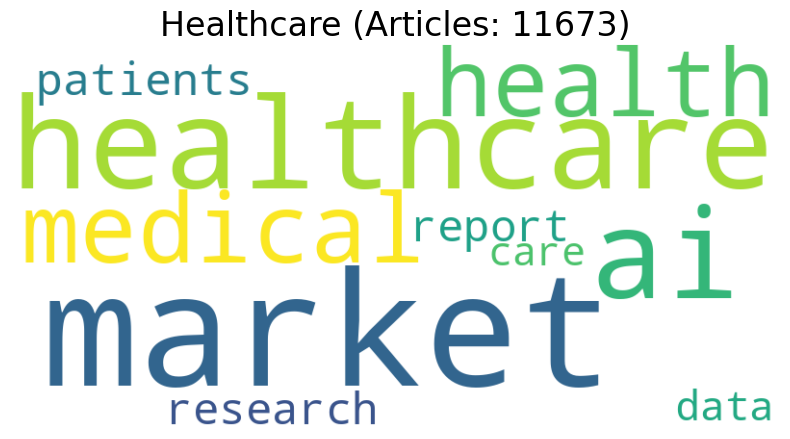

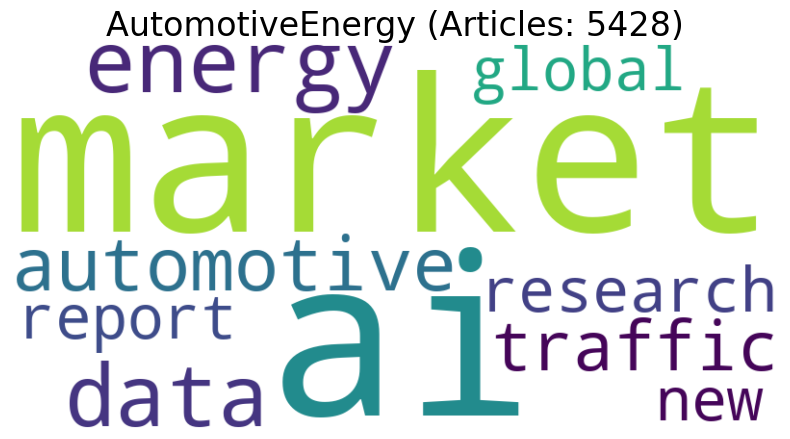

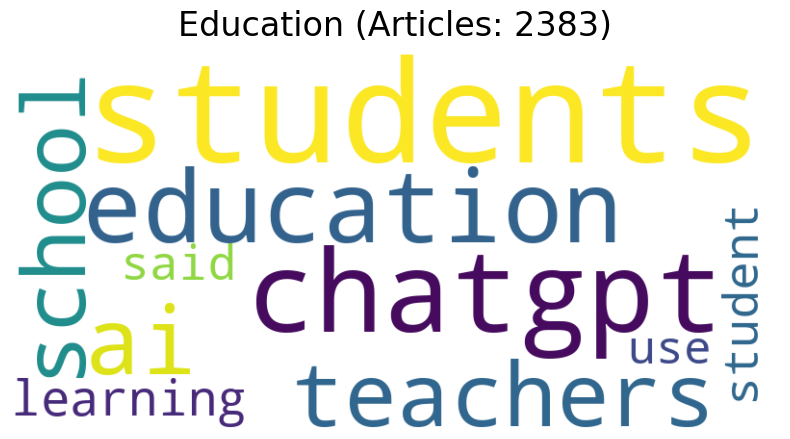

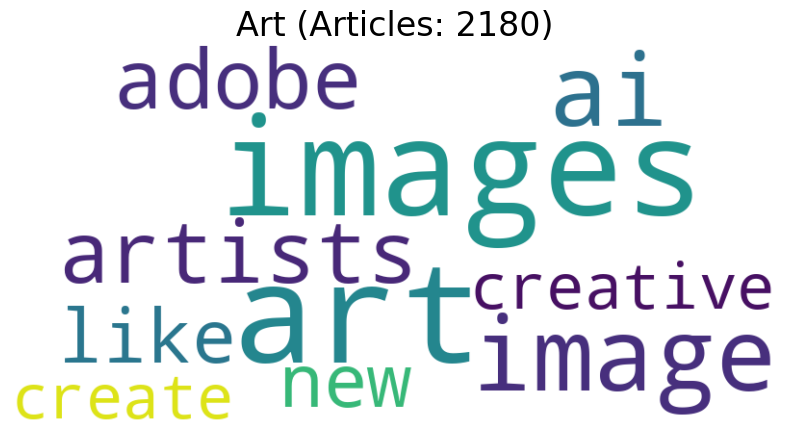

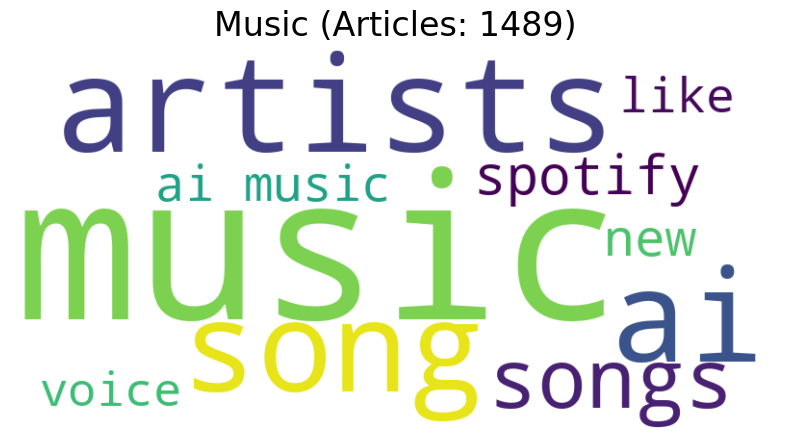

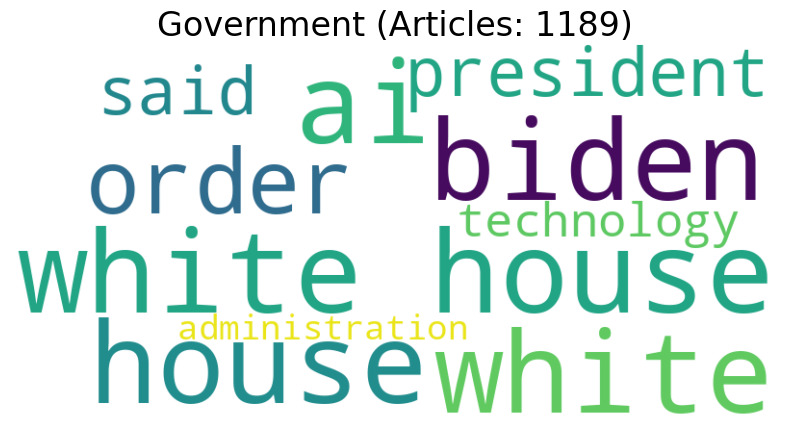

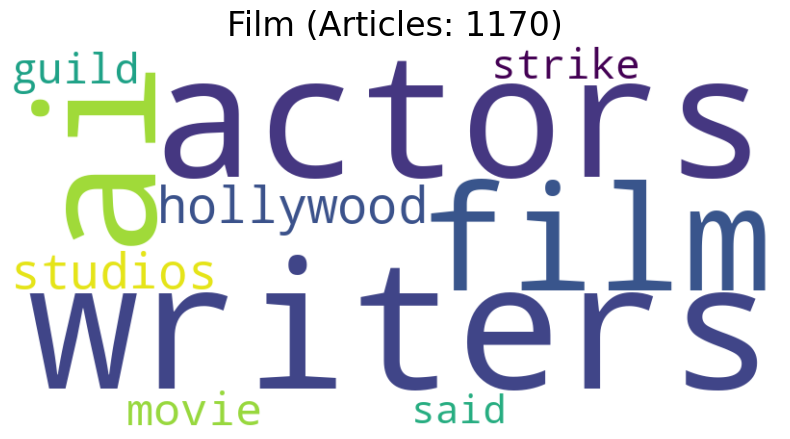

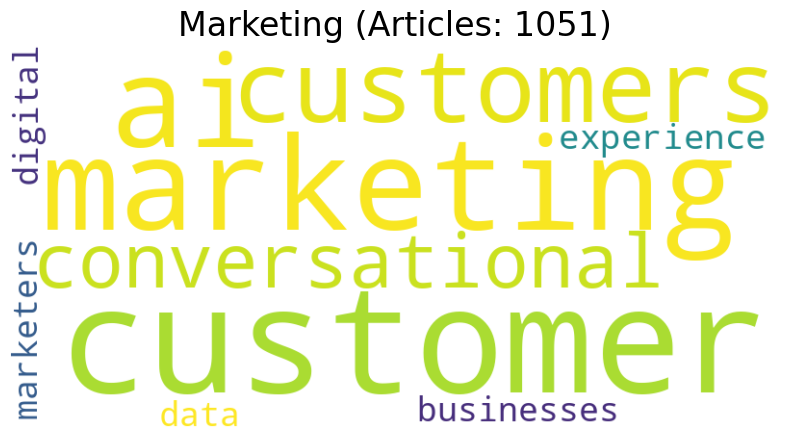

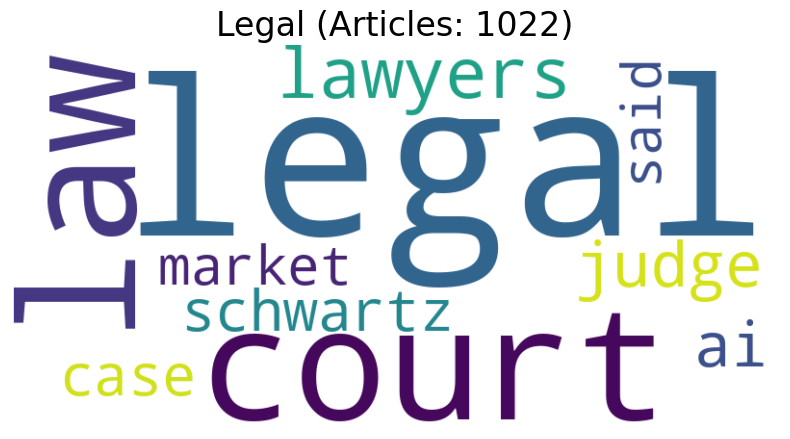

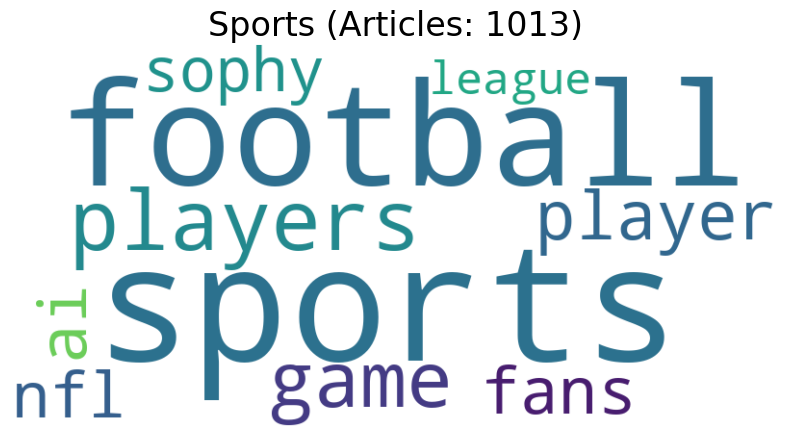

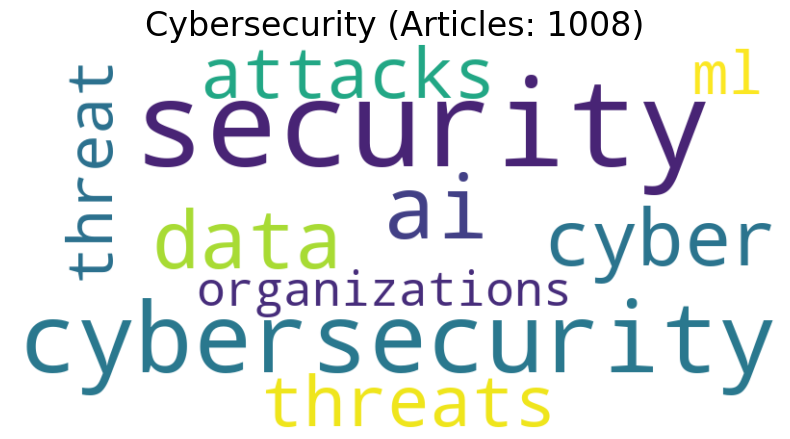

In [12]:
from bertopic import BERTopic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your pre-trained BERTopic model
# Assuming your model is saved in a directory named 'bertopic_model'
model = BERTopic.load("./models/topic_model_500.model")

# Define your topic names
topic_names = {
    0: 'Healthcare',
    3: 'AutomotiveEnergy',
    5: 'Education',
    6: 'Art',
    11: 'Music',
    17: 'Government',
    18: 'Film',
    19: 'Marketing',
    20: 'Legal',
    21: 'Sports',
    22: 'Cybersecurity'
}

# Update model's topic names
model.topic_names = {topic_num: f"{topic_num}. {name}" for topic_num, name in topic_names.items()}

# First, get the overall topic information which includes the number of documents per topic
topic_info = model.get_topic_info()


# Generate and display word clouds for the specified topics
for topic, name in topic_names.items():
    # Get the terms and their frequencies for the current topic
    terms, frequencies = zip(*model.get_topic(topic))
    
    # Retrieve the number of documents/articles for the current topic
    num_documents = topic_info[topic_info['Topic'] == topic]['Count'].values[0]
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(zip(terms, frequencies)))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"{name} (Articles: {num_documents})", fontsize=24)
    plt.axis("off")
    plt.show()



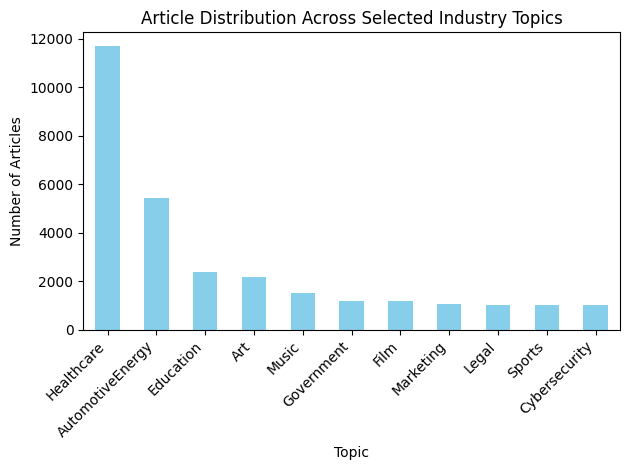

In [16]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to hold the count of documents for your topics of interest
topic_counts = {}

# Iterate through your defined topic names to populate the dictionary
for topic, name in topic_names.items():
    # Retrieve the number of documents/articles for the current topic
    if topic in topic_info['Topic'].values:
        num_documents = topic_info[topic_info['Topic'] == topic]['Count'].iloc[0]
        topic_counts[name] = num_documents
    else:
        print(f"Topic {topic} not found in the model's topic_info")

# Create a pandas Series from the dictionary for easy plotting
topic_counts_series = pd.Series(topic_counts)

# Sort topics by their counts in descending order for the plot
topic_counts_series_sorted = topic_counts_series.sort_values(ascending=False)

# Plot the sorted topic counts
topic_counts_series_sorted.plot(kind='bar', color='skyblue')
plt.title('Article Distribution Across Selected Industry Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [2]:
import pandas as pd

df_filtered = pd.read_parquet('./data/filtered_news_with_topics.parquet')
df_filtered.head()

,url,date,language,title,text,token_count,cleaned_text,topic_num,topic_name
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,951,LegalTech AI Market 2019 Technology Advancemen...,20,Legal
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,2055,Covid-19: un messaggio dai ricercatori italian...,0,Healthcare
7,http://www.sbwire.com/press-releases/healthcar...,2022-10-06,en,Healthcare Artificial Intelligence Market Anal...,\n\nHealthcare Artificial Intelligence Market ...,804,Healthcare AI Market Analysis and Forecast for...,0,Healthcare
14,https://agenparl.eu/funding-boost-for-artifici...,2020-08-28,en,Funding boost for artificial intelligence in N...,\nFunding boost for artificial intelligence in...,1601,Funding boost for AI in NHS to speed up diagno...,0,Healthcare
18,https://asapland.com/one-punch-man-a-fan-imagi...,2020-07-24,en,One Punch Man: a fan imagined King in reality ...,One Punch Man: a fan imagined King in reality ...,804,One Punch Man: a fan imagined King in reality ...,6,Art


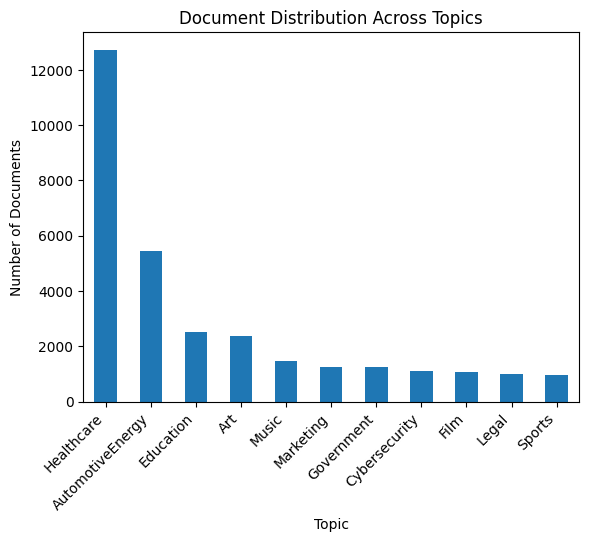

In [3]:
import matplotlib.pyplot as plt

# Plotting topic distribution
topic_counts = df_filtered['topic_name'].value_counts()
topic_counts.plot(kind='bar')
plt.title('Document Distribution Across Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45, ha="right")
plt.show()


In [4]:
# Assuming 'probabilities' contains the probability distributions for each document
import seaborn as sns

# Choose a specific topic to visualize probabilities for
selected_topic = 0
selected_probabilities = [prob[selected_topic] for prob in probabilities if prob]

sns.histplot(selected_probabilities, bins=30, kde=True)
plt.title(f'Probability Distribution for Topic {selected_topic}')
plt.xlabel('Probability')
plt.ylabel('Document Count')
plt.show()


NameError: name 'probabilities' is not defined

In [ ]:
# Convert BERTopic's topics to pyLDAvis format
topic_model.visualize_topics()

In [ ]:
# Visualize terms for a specific topic
topic_model.visualize_barchart(topic=0)